# **Data Set info**

Data set taken from: https://web.stanford.edu/~hastie/ElemStatLearn/datasets/LAozone.data

The data is the recorded level of ozone concentration in the LA in 1976. The below code is taken from my code for a prostate cancer dataset and modified to fit this data.

Detailed variable names:

**ozone** : Upland Maximum Ozone (This is what we want to predict)

**vh** : Vandenberg 500 mb Height

**wind** : Wind Speed (mph)

**humidity** : Humidity (%)

**temp** : Sandburg AFB Temperature

**ibh** : Inversion Base Height

**dpg** : Daggot Pressure Gradient

**ibt** : Inversion Base Temperature

**vis** : Visibility (miles)

**doy** : Day of the Year

# **Data Preproccessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds = pd.read_csv('LAozone.txt',",",index_col=9)
#ds = ds.drop(columns=['Unnamed: 0', 'train'], axis=1)
ds.head()
#ds.info()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis
doy,,,,,,,,,
3,3,5710,4,28,40,2693,-25,87,250
4,5,5700,3,37,45,590,-24,128,100
5,5,5760,3,51,54,1450,25,139,60
6,6,5720,4,69,35,1568,15,121,60
7,4,5790,6,19,45,2631,-33,123,100


**Above are the first few lines of the data set**

In [ ]:
X = ds.iloc[:, 1:].values
y = ds.iloc[:, 0].values

**The Dataset is split into 80% train, 10% validation, and 10% test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [ ]:
ds.corr()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis
ozone,1.000000,0.607344,-0.013414,0.449224,0.780703,-0.589534,0.214046,0.745578,-0.440989
vh,0.607344,1.000000,-0.243664,0.074485,0.808059,-0.504835,-0.148071,0.852021,-0.360080
wind,-0.013414,-0.243664,1.000000,0.210293,-0.032070,0.206596,0.335747,-0.179517,0.147227
humidity,0.449224,0.074485,0.210293,1.000000,0.340474,-0.242328,0.647789,0.203648,-0.401008
temp,0.780703,0.808059,-0.032070,0.340474,1.000000,-0.532645,0.189242,0.864787,-0.387721
ibh,-0.589534,-0.504835,0.206596,-0.242328,-0.532645,1.000000,0.037078,-0.776933,0.386686
dpg,0.214046,-0.148071,0.335747,0.647789,0.189242,0.037078,1.000000,-0.095060,-0.125855
ibt,0.745578,0.852021,-0.179517,0.203648,0.864787,-0.776933,-0.095060,1.000000,-0.422372
vis,-0.440989,-0.360080,0.147227,-0.401008,-0.387721,0.386686,-0.125855,-0.422372,1.000000


**Above is a correlation table similar to the one seen in the Table 2.2 in the textbook**

**Next the train, test, and validation data is all scaled and a column of 1s is appended to each in order to leave a spot for B_0**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.fit_transform(X_val)

In [ ]:
ones = np.ones((1,len(X_train)))
X_train = np.insert(X_train, 0, ones, axis=1)

ones = np.ones((1,len(X_val)))
X_val = np.insert(X_val, 0, ones, axis=1)

ones = np.ones((1,len(X_test)))
X_test = np.insert(X_test, 0, ones, axis=1)

### **Part A: Plain Regression**

**Below is linear algebra to get values for the betas. The equation used is 3.7 from the textbook:**

**Beta = X(X^T * X)^-1 * X^T * y**

In [ ]:
#ADD COMMENT OF EQ IN
a = np.linalg.inv(np.matmul(np.transpose(X_train),X_train))
b = np.matmul(np.transpose(X_train),y_train)
beta = np.matmul(a,b)
print("Array of betas: " , beta)

Array of betas:  [11.61742424 -0.58277376  0.15586593  1.58652285  3.58796632 -0.88080235
 -0.15558106  2.17853661 -0.53761031]


**Next from the betas calculated above, results for the test data were predicted**

In [ ]:
pred = [];
for i in range(0, len(X_test)):
  f = np.matmul(np.transpose(X_test[i]), beta)
  pred.append(f)

pred = np.array(pred)
print("Predictions: ", pred)

Predictions:  [ 7.33733057 24.0171214  16.59071194 17.98145916  8.84828419 17.64847478
 13.94772992  3.88648983 10.37322034 13.27568049 13.05450468 20.55683509
  7.26306004  4.98032677  6.84671493  8.71805268 13.97106448  9.78145008
  3.39002402  8.28719711 15.78639002 22.11955617  4.61650196  9.2265324
 20.15903791  0.62810039 20.45330954 22.16842293  3.59452858 20.66591192
  3.27407028  0.72233181 18.50886707]


In [ ]:
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))


[[ 7.33733057  4.        ]
 [24.0171214  30.        ]
 [16.59071194 19.        ]
 [17.98145916 17.        ]
 [ 8.84828419 12.        ]
 [17.64847478 19.        ]
 [13.94772992 15.        ]
 [ 3.88648983  5.        ]
 [10.37322034  6.        ]
 [13.27568049  5.        ]
 [13.05450468 14.        ]
 [20.55683509 24.        ]
 [ 7.26306004  5.        ]
 [ 4.98032677  1.        ]
 [ 6.84671493  6.        ]
 [ 8.71805268 10.        ]
 [13.97106448 18.        ]
 [ 9.78145008 10.        ]
 [ 3.39002402  4.        ]
 [ 8.28719711 10.        ]
 [15.78639002 14.        ]
 [22.11955617 28.        ]
 [ 4.61650196  7.        ]
 [ 9.2265324   7.        ]
 [20.15903791 25.        ]
 [ 0.62810039  6.        ]
 [20.45330954 26.        ]
 [22.16842293 24.        ]
 [ 3.59452858  4.        ]
 [20.66591192 23.        ]
 [ 3.27407028  9.        ]
 [ 0.72233181  4.        ]
 [18.50886707 14.        ]]


**Above is the table of the predicted results versus the test data. The predicted results are shown on the left side of the table. As seen from the table the predicted results using plain regressions seems to line up fairly close to the test data**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print("MSE: ", mse)
baseline = []
avg = np.average(y_train)
for i in range(0, len(y_test)):
  baseline.append(avg)
baseline_mse = mean_squared_error(y_test, baseline)
print("baseline MSE: ", baseline_mse)
#standard_error = np.array(np.sqrt(np.diagonal(mse * np.linalg.inv(np.dot(X_test.T, X_test)))))
#print(standard_error)

MSE:  12.587065858064149
baseline MSE:  68.60664887511479


**As seen from the MSE for the preditions is smaller than the baseline MSE, thus this is a pretty good model to use for the dataset**

**Below are calulations done for the standard error and z-score. The equation used to calculate the standard error is based off equation 3.8 from the textbook:**

**variance = (1/N - P - 1) * MSE    ; where N is the length of the X training data and P is the length of the beta array**

**standard error = squareroot((X^T * X)^-1 * var)**

**Z-score = beta/standard error**

In [ ]:
#ADD COMMENT OF EQ IN
N = len(X_train)
p = len(beta)

var = (1/(N-p-1)) * mse
#standard_error = var / (np.sqrt(N))
standard_error = np.sqrt(abs(np.linalg.inv(np.matmul(np.transpose(X_test), X_test)) * var))

standard_error1 = []
for i in range(0, len(standard_error)):
  standard_error1.append(standard_error[i][i])
#print(standard_error1)
standard_error1 = np.array(standard_error1)

z_score = []
#z_score1 = []
for i in range(0, len(standard_error1)):
  z_score.append(beta[i]/standard_error1[i])

#for i in range(0, len(z_score)):
# z_score1.append(np.mean(z_score[i]))


In [ ]:
terms = ['Intercept', 'vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis']
data = {'Term' : terms,
      'Coefficent' : beta, 
      'Std. Error' : standard_error1, 
      'Z Score' : z_score}
df2 = pd.DataFrame(data, columns=['Term', 'Coefficent', 'Std. Error', 'Z Score'])
df2

,Term,Coefficent,Std. Error,Z Score
0,Intercept,11.617424,0.042699,272.074346
1,vh,-0.582774,0.114634,-5.083796
2,wind,0.155866,0.061991,2.514326
3,humidity,1.586523,0.073165,21.684057
4,temp,3.587966,0.151827,23.632015
5,ibh,-0.880802,0.120777,-7.292786
6,dpg,-0.155581,0.087015,-1.787970
7,ibt,2.178537,0.258600,8.424339
8,vis,-0.537610,0.069359,-7.751109


**Above is a coefficent table similar to table 2.3 in the textbook. The results in this table are similar to the onces the textbook got. The standard errors is fairly low, which again suggests that the linear model is good for this data set**

### **Part B: Ridge Regression**

**Before starting the calculation foor the betas for ridge regression I found it was better to drop the 1s columns in the train, test, and validation data in order for b_0 to not penalize the predictions**

In [ ]:
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)
X_val = np.delete(X_val, 0, axis=1)

In [ ]:
b_0 = np.average(y_train)

**Below is the calulation for figuring out the best lambda. This was done by testing out 1000 lambdas in the ranges 0.1 to 100. The equation used is 3.44 from the textbook:**

**beta_ridge = (X^T * X + lambda * I)^-1 * X^T * y**

In [ ]:
#ADD COMMENT OF EQ IN
c = np.matmul(np.transpose(X_train), X_train)
I = np.identity(8)
beta_ridge = []
lowest_error = 99999999
best_lambda = 0
lambda_list = []
for l in np.linspace(0.1, 100, 1000) :
  lambda_list.append(l)

  #--------Getting beta_ridge--------------#

  d = l * I
  e = np.linalg.inv(c + d)
  g = np.matmul(e, np.transpose(X_train))
  r = np.matmul(g, y_train)
  beta_ridge.append(r)

  #--------Predicting vaidation data using beta_ridge--------------#

  pred2 = [];
  for i in range(0, len(X_val)):
    p = np.matmul(np.transpose(X_val[i]), r)
    p = p + b_0
    pred2.append(p)


  #pred2 = np.array(pred2)
  #print(np.concatenate((pred2.reshape(len(pred2),1), y_val.reshape(len(y_val),1)),1))
  error = mean_squared_error(y_val, pred2)
  #print(error)

  #--------getting best error--------------#

  if error < lowest_error:
    lowest_error = error
    best_lambda = l
  
  
  
print("Lowest Error: ", lowest_error)
print("Best Lambda: ", best_lambda)

beta_ridge = np.array(beta_ridge)
lambda_list = np.array(lambda_list)
beta_ridge = np.delete(beta_ridge, 0, axis=1)
#lambda_list = np.delete(lambda_list, 0)
#print(beta_ridge)
#print(lambda_list[i].size)

Lowest Error:  24.002605119884226
Best Lambda:  0.1


**As seen the best lambda turns out to be 0.1**

In [ ]:
#ADD COMMENT OF EQ IN
d1 = best_lambda * I
e1 = np.linalg.inv(c + d1)
g1 = np.matmul(e1, np.transpose(X_train))
actual_beta_ridge = np.matmul(g1, y_train)

print("Beta ridge with best lambda: ", actual_beta_ridge)

Beta ridge with best lambda:  [-0.57704162  0.15660257  1.58581966  3.58209941 -0.88192032 -0.15343657
  2.17761892 -0.53768696]


In [ ]:
pred3 = [];
for i in range(0, len(X_test)):
  f = np.matmul(np.transpose(X_test[i]), actual_beta_ridge)
  f = f + b_0
  pred3.append(f)

pred3 = np.array(pred3)
print(np.concatenate((pred3.reshape(len(pred3),1), y_test.reshape(len(y_test),1)),1))
mse2 =  mean_squared_error(y_test, pred3)
print("MSE: ", mse2)

[[ 7.33781542  4.        ]
 [24.01127054 30.        ]
 [16.59118118 19.        ]
 [17.98047345 17.        ]
 [ 8.84669547 12.        ]
 [17.64703548 19.        ]
 [13.9466731  15.        ]
 [ 3.88575803  5.        ]
 [10.37372763  6.        ]
 [13.26775723  5.        ]
 [13.05693826 14.        ]
 [20.55662522 24.        ]
 [ 7.26190529  5.        ]
 [ 4.97678406  1.        ]
 [ 6.85230488  6.        ]
 [ 8.71850422 10.        ]
 [13.97235116 18.        ]
 [ 9.78349582 10.        ]
 [ 3.38880065  4.        ]
 [ 8.28229654 10.        ]
 [15.78618909 14.        ]
 [22.11840951 28.        ]
 [ 4.62197424  7.        ]
 [ 9.22437047  7.        ]
 [20.15694942 25.        ]
 [ 0.62616914  6.        ]
 [20.45155844 26.        ]
 [22.16722903 24.        ]
 [ 3.60250926  4.        ]
 [20.66359746 23.        ]
 [ 3.27269731  9.        ]
 [ 0.71767061  4.        ]
 [18.50794481 14.        ]]
MSE:  12.587771711210419


**Above just as before is a table that compares the predicted with the actual values. Again all of the predictions are fairly close. The MSE is smaller than the baseline MSE, thus this is a pretty good model to use for the dataset. The Ridge regression MSE is a bit smaller than the regular regression MSE, so this would be a much better model to use**

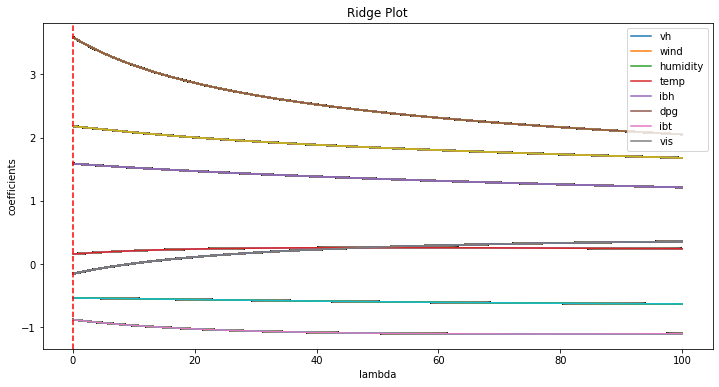

In [ ]:
from itertools import cycle
lab1 = ['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis']
plt.figure(figsize=(12,6))
for i in range(0,len(lambda_list)):
    plt.plot(lambda_list,beta_ridge, label=lab1)
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Ridge Plot')
plt.axis('tight')
plt.legend(lab1,loc=1,prop={'size': 10})
plt.axvline(x=(best_lambda), color = 'red', linestyle='--')
plt.show()

**Above is a ridge plot which shows lambdas versus the coefficents for each feature. The red line indicates the lambda that was used for predicting the test data**

### **Part C: Lasso Regression**

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.linear_model import lasso_path
eps = 5e-3
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps)
neg_log_alphas_lasso = -np.log10(alphas_lasso)

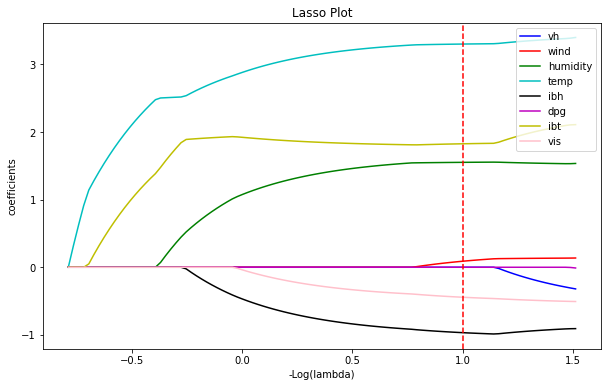

In [ ]:
lab = ['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis']
plt.figure(figsize=(10,6))
colors = cycle(['b', 'r', 'g', 'c', 'k', 'm', 'y', 'pink'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
  l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c, label=lab)
plt.xlabel('-Log(lambda)')
plt.ylabel('coefficients')
plt.title('Lasso Plot')
plt.axis('tight')
plt.legend(lab,loc=1,prop={'size': 10})
plt.axvline(x=(-np.log10(best_lambda)), color = 'red', linestyle='--')
plt.show()

**Above is a lasso plot of the train data, which graphs the -log of the lambdas versus the coefficients for each feature. Just as before the redline indicates the best lambda that was used for predicting the test data. The code for the graph is based off the following link: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html**

**Selected features and why they make sense**

The features selected by this lasso plot are **temperature, ibt, humidity, and wind**. These features makes sense to have been selected as temperature is known for having a strong correlation with ozone levels. Higher temperature leads to higher ozone. After doing research I have also discovered that ibt (Inversion Base Temperature) has a large impact on how polluted the air is, so this will correlate to higher ozone. As for humidity and wind the data is a little more wild, but researchers suggest that these as well have an impact on ozone levels. 


In [ ]:
reg = linear_model.Lasso(alpha=best_lambda)
reg.fit(X_train, y_train)


pred5 = reg.predict(X_test)

print(np.concatenate((pred5.reshape(len(pred5),1), y_test.reshape(len(y_test),1)),1))
print("MSE: ", mean_squared_error(y_test, pred5))

[[ 7.55848832  4.        ]
 [23.39192197 30.        ]
 [16.45556239 19.        ]
 [17.91249958 17.        ]
 [ 8.82500762 12.        ]
 [17.70102024 19.        ]
 [13.81115031 15.        ]
 [ 4.23196735  5.        ]
 [10.48830151  6.        ]
 [12.66022355  5.        ]
 [13.13997974 14.        ]
 [20.61281887 24.        ]
 [ 7.2031638   5.        ]
 [ 4.66694998  1.        ]
 [ 7.26460572  6.        ]
 [ 8.46944006 10.        ]
 [13.91447627 18.        ]
 [ 9.73706799 10.        ]
 [ 3.65118329  4.        ]
 [ 7.84053311 10.        ]
 [15.83967152 14.        ]
 [21.9550551  28.        ]
 [ 4.85546818  7.        ]
 [ 9.06160133  7.        ]
 [19.93598898 25.        ]
 [ 0.6397081   6.        ]
 [20.46503328 26.        ]
 [22.21969011 24.        ]
 [ 4.0966014   4.        ]
 [20.56630539 23.        ]
 [ 3.32967166  9.        ]
 [ 0.50901656  4.        ]
 [18.40857788 14.        ]]
MSE:  12.693834432471144


**Above again is a table that compares the predicted with the actual values for the lasso method. As seen the predictions are fairly close. The MSE is smaller than the baseline MSE, so lasso good model to use for the dataset. The lasso method MSE is very similar to the ridge regression MSEs. Overall lasso seems like the best model to use for this dataset.**

**In a seperate file this exact same procedure is followed, but this time some of the features have nonlinear operations preformed on them in order to try to improve the preformance**